In [313]:
import numpy as np
import pandas as pd

import dask
import dask.dataframe as dd
import dask.array as da
import dask.bag as db

In [314]:
datasets = []
for n in range(10):
    ds = {
        "metadata": {
            "id": n
        },
        "data": []
    }
    for m in range(5):
        ds['data'].append({
            "X": np.random.rand(10),
            "Y": np.random.rand(10)
        })
    datasets.append(ds)


In [315]:
pdf = pd.DataFrame.from_records(datasets)

In [316]:
df = dd.from_pandas(pdf, npartitions=5)

In [317]:
b = df.to_bag(format='dict')

In [318]:
partitions = b.to_delayed()

In [202]:
def get_metadata(part):
    output = []
    for p in part:
        output.append(p['metadata'])
    return output

delayed_values = [dask.delayed(get_metadata)(part) for part in partitions]

In [203]:
delayed_values

[Delayed('get_metadata-0415bb3f-d4a3-40a6-bd41-e28bdd71e787'),
 Delayed('get_metadata-2f74e1f1-4350-4ee6-80ab-8f4b934ff913'),
 Delayed('get_metadata-67a108b0-77e7-4430-8aff-9a05661e7a3a'),
 Delayed('get_metadata-22ea6c6f-a965-48f9-82ae-ac7293eff317'),
 Delayed('get_metadata-55ace719-dc99-423c-8722-6bf87af26b40')]

In [204]:
dask.compute(*delayed_values)

([{'id': 0}, {'id': 1}],
 [{'id': 2}, {'id': 3}],
 [{'id': 4}, {'id': 5}],
 [{'id': 6}, {'id': 7}],
 [{'id': 8}, {'id': 9}])

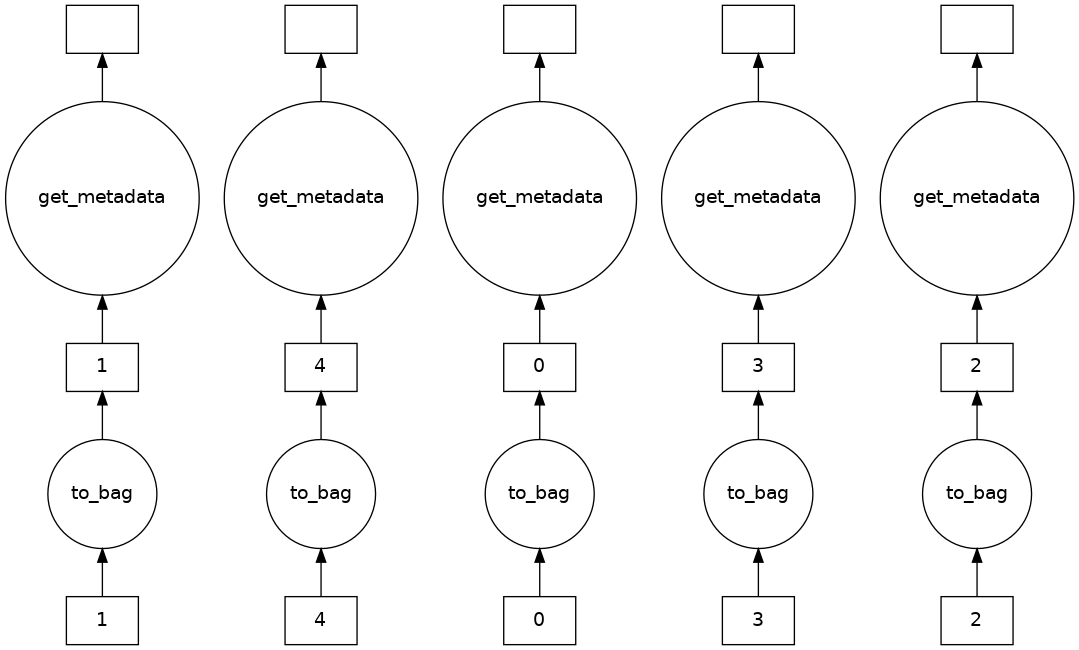

In [205]:
dask.visualize(*delayed_values)

In [142]:
dfs = df.to_delayed()
results = [df['metadata'] for df in dfs]

In [144]:
dd.compute(*results)

(0    {'id': 0}
 Name: metadata, dtype: object,
 1    {'id': 1}
 Name: metadata, dtype: object)

In [184]:
partitions[0].compute()

[{'metadata': {'id': 0},
  'data': [{'X': array([0.53696727, 0.67744973, 0.42547422, 0.57180472, 0.7619324 ,
           0.60933859, 0.33653987, 0.62717853, 0.12450924, 0.85119033]),
    'Y': array([0.95826123, 0.02836915, 0.57918096, 0.87533795, 0.15991389,
           0.33831928, 0.35634311, 0.99153692, 0.34407261, 0.16267357])},
   {'X': array([0.47905842, 0.84321668, 0.74923153, 0.77690791, 0.54685884,
           0.03815512, 0.40336487, 0.33105244, 0.13540227, 0.38078084]),
    'Y': array([0.4816519 , 0.14856611, 0.90263356, 0.15498554, 0.24621009,
           0.55038261, 0.99552622, 0.0537318 , 0.63829458, 0.98702554])},
   {'X': array([0.6842097 , 0.78256665, 0.99340302, 0.89843773, 0.5433517 ,
           0.27651074, 0.69859079, 0.38187009, 0.40940496, 0.07855298]),
    'Y': array([0.14684606, 0.39693823, 0.66379483, 0.21844243, 0.92582423,
           0.12992934, 0.20846395, 0.10685808, 0.36265438, 0.00280027])},
   {'X': array([0.41682124, 0.36381065, 0.6356136 , 0.81458973, 0.6169

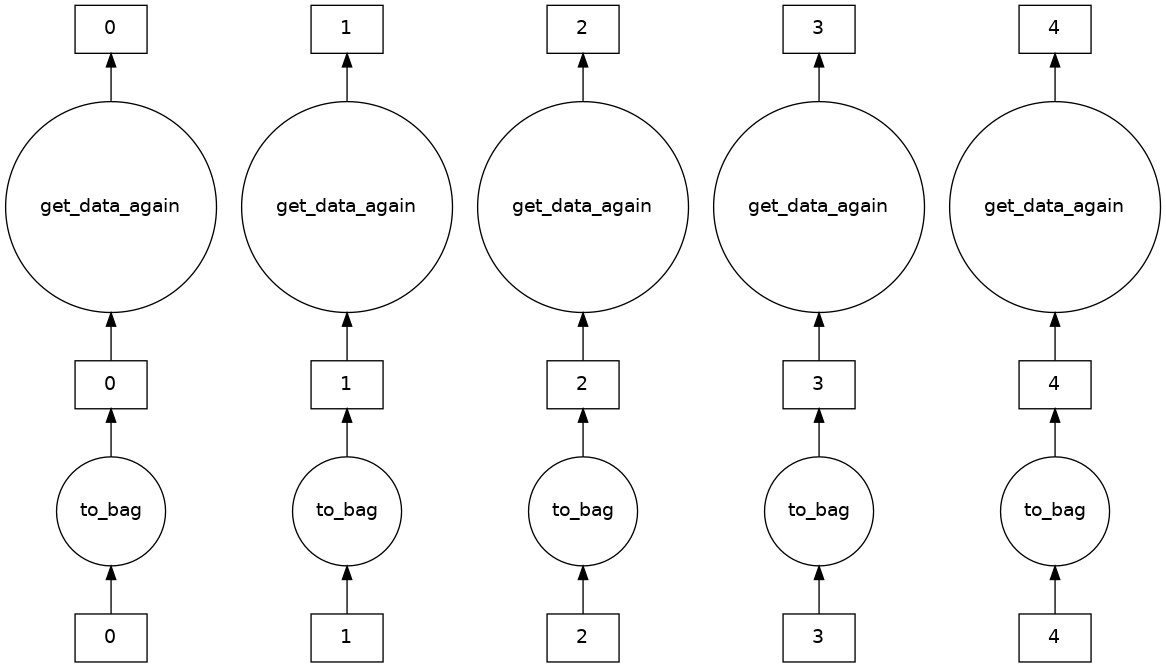

In [216]:
def calculate_stats(d):
    result = {
        "min_X": np.min(d['X']),
        "max_X": np.max(d['X']),
        "min_Y": np.min(d['Y']),
        "max_Y": np.max(d['Y']),
    }
    return result

def get_data(part):
    results = []
    for record in part:
        for d in record['data']:
            y = dask.delayed(calculate_stats)(d)
            results.append(y)
    return results

def get_data_again(record):
    results = []
    for d in record['data']:
        y = calculate_stats(d)
        yield y

b.map(get_data_again).visualize()

In [200]:
b.map(get_data_again).compute()

[[{'min_X': 0.12450924176670186,
   'max_X': 0.8511903346419625,
   'min_Y': 0.028369151495403866,
   'max_Y': 0.9915369204836436},
  {'min_X': 0.03815511919624415,
   'max_X': 0.8432166797791275,
   'min_Y': 0.05373179638421999,
   'max_Y': 0.9955262200432146},
  {'min_X': 0.0785529758409722,
   'max_X': 0.9934030208732562,
   'min_Y': 0.0028002655673560195,
   'max_Y': 0.9258242303531475},
  {'min_X': 0.044605628262007646,
   'max_X': 0.8145897251883287,
   'min_Y': 0.15779086974559087,
   'max_Y': 0.9040479559190692},
  {'min_X': 0.09625089807620824,
   'max_X': 0.8012019764897522,
   'min_Y': 0.05462629663986662,
   'max_Y': 0.9407009404684983}],
 [{'min_X': 0.3591027373580734,
   'max_X': 0.9956801792965664,
   'min_Y': 0.1020121742518606,
   'max_Y': 0.9050266187228211},
  {'min_X': 0.1283531816550676,
   'max_X': 0.9638487424876507,
   'min_Y': 0.010092351439128788,
   'max_Y': 0.872270609704667},
  {'min_X': 0.17395386785811962,
   'max_X': 0.897597403878453,
   'min_Y': 0.0073

In [217]:
delayed_values = [dask.delayed(get_data)(part) for part in partitions]

In [218]:
dask.compute(*delayed_values)

([Delayed('calculate_stats-38d3d9be-f3d8-4c75-ba1d-f691c68e3cbc'),
  Delayed('calculate_stats-bbf121b5-6b10-48f0-aabc-e01a0a8574e3'),
  Delayed('calculate_stats-7a3575bc-1127-4135-8773-85112a720245'),
  Delayed('calculate_stats-d6280bf3-e60b-4825-bfca-eae908b6d069'),
  Delayed('calculate_stats-d60ad57d-8570-4dc8-8f5b-8e82c793f819'),
  Delayed('calculate_stats-d38b3518-3808-45e7-8b04-90551b66e8a9'),
  Delayed('calculate_stats-2b37782c-f945-4a18-8ba7-0fff69544182'),
  Delayed('calculate_stats-7878d1e9-5e2e-4483-9310-7e73d735f62b'),
  Delayed('calculate_stats-121e2e48-55e2-468e-9ee4-18eaa14062af'),
  Delayed('calculate_stats-64c38465-113d-41ae-b37d-bd402ca4127b')],
 [Delayed('calculate_stats-e86a84af-fa92-41b7-a280-255e9f1bf3ea'),
  Delayed('calculate_stats-3604b83e-58e2-451d-b016-3e2d74e98e9e'),
  Delayed('calculate_stats-6ec3ed89-a713-4f3c-ae44-bdd68e2388d7'),
  Delayed('calculate_stats-9930897f-4a23-463a-8001-ee3f936a74f9'),
  Delayed('calculate_stats-8262f28f-d89e-4f05-913b-d4b97d6393

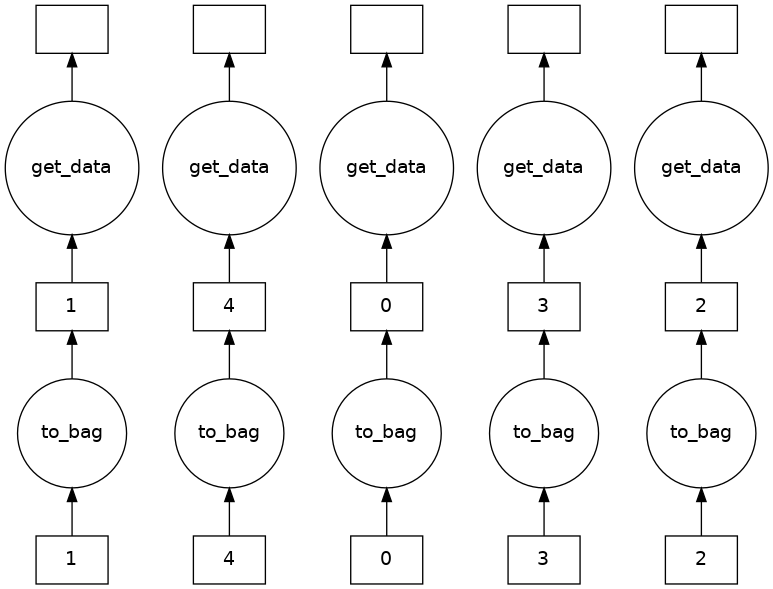

In [219]:
dask.visualize(*delayed_values)

In [256]:
def inc(n):
    return n + 1

data = [[1,2,3], [4,5,6]]

outer = []
for d in data:
    inner = []
    for num in d:
        x = inc(num)
        inner.append(x)
    outer.append(inner)
outer


[[2, 3, 4], [5, 6, 7]]

In [257]:
computations = []
for element in data:
    part = []
    for e in element:
        part.append(dask.delayed(inc)(e))
    computations.append(part)

In [263]:
from dask.distributed import Client
client = Client()

results = dask.compute(*computations, scheduler='distributed', num_workers=4)

In [264]:
results

([2, 3, 4], [5, 6, 7])

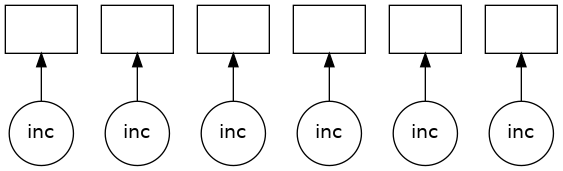

In [266]:
dask.visualize(*computations)

In [267]:
results = dask.compute(*computations)

In [269]:
computations = [[dask.delayed(inc)(e) for e in element] for element in data]

In [270]:
results = dask.compute(*computations)

In [308]:
results

([2, 3, 4], [5, 6, 7])

In [309]:
map(lambda x:map(inc,x), data)

In [311]:
list(map(lambda x: list(map(inc,x)), data))

[[2, 3, 4], [5, 6, 7]]

In [329]:
def get_data(part):
    results = []
    for record in part:
        y = dask.delayed(calculate_stats)(record)
        results.append(y)
    return results


result = b.map(lambda record: get_data(record['data']))

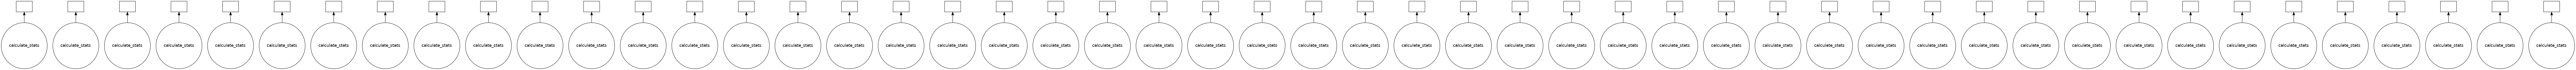

In [331]:
dask.visualize(*result)